In [1]:
import numpy as np

data = []

col1 = np.random.uniform(
    low=-1.5, 
    high=np.nextafter(1.5, np.inf), 
    size=(1100,)
)
col2 = np.random.uniform(
    low=-3.5, 
    high=np.nextafter(1.5, np.inf), 
    size=(1100,)
)

col3 = np.random.randint(
    low=1, 
    high=np.nextafter(4, np.inf), 
    size=(1100,)
)

for i in range(len(col1)): 
    data.append([col1[i], col2[i]])

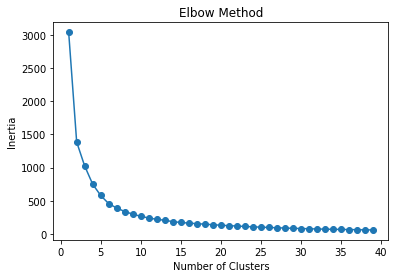

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans()
# kmeans.set_params(n_clusters=10)
# kmeans.fit(data)

# plt.scatter(col1, col2, c=kmeans.labels_, alpha=0.8)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="+", s=1000)
# plt.show()

inertias = []

irange = range(1,40)

for i in irange:
    kmeans.set_params(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
plt.plot(irange, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import pandas as pd

def linkage_frame(data, method="complete"):
    row_clusters = linkage(data, method=method, metric='euclidean')
    columns = ['row label 1', 'row label 2', 'distance', 'no. items in clust.']
    index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
    linkage_df = pd.DataFrame(row_clusters, columns=columns, index=index)
    return linkage_df

linkage_complete = linkage_frame(data)
linkage_average = linkage_frame(data, method="average")


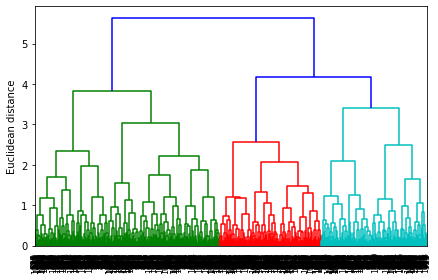

In [4]:
row_dendr = dendrogram(linkage_complete, leaf_rotation=90, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

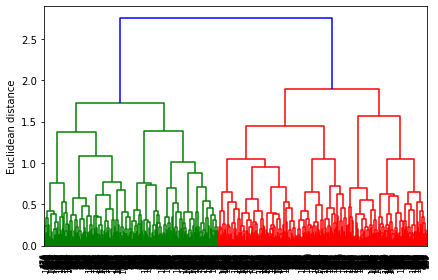

In [5]:
row_dendr = dendrogram(linkage_average, leaf_rotation=90, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [11]:
import csv 

data = []
with open("HW3_Q2_1_1.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        data.append([row[0], row[1]])

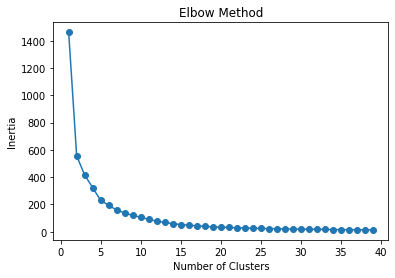

In [12]:
inertias = []

irange = range(1,40)

for i in irange:
    kmeans.set_params(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
plt.plot(irange, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

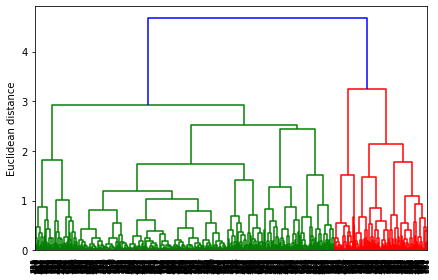

In [26]:
linkage_complete = linkage_frame(data)
linkage_average = linkage_frame(data, method="average")

row_dendr = dendrogram(linkage_complete, leaf_rotation=90, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
row_dendr = dendrogram(linkage_average, leaf_rotation=90, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [25]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

x = np.asarray([row[0] for row in data]).reshape(-1, 1)
y = np.asarray([row[1] for row in data]).reshape(-1, 1)

x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=123)

randomForest = ensemble.RandomForestClassifier()

rnd_clf = randomForest.set_params(n_estimators=20, random_state=42)
rnd_clf.fit(x_train, y_train)

print("The training error of random forest is: %.5f" %(1 - rnd_clf.score(x_train, y_train)))
print("The test     error of random forest is: %.5f" %(1 - rnd_clf.score(x_test, y_test)))


The training error of random forest is: 0.01970
The test     error of random forest is: 1.00000


In [ ]:
rnd_clf = randomForest.set_params(n_estimators=20, random_state=42)
rnd_clf.fit(x_train, y_train)

print("The training error of random forest is: %.5f" %(1 - rnd_clf.score(x_train, y_train)))
print("The test     error of random forest is: %.5f" %(1 - rnd_clf.score(x_test, y_test)))